# Subplots

In [1]:
#下一行：如果用这行，下面会提示 Javascript Error: IPython is not defined
#%matplotlib notebook 
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

#plt.subplot?

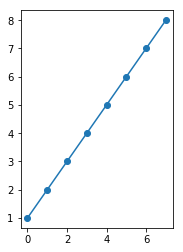

In [45]:
plt.figure()
# subplot：一行，两列，前两个数改的是行列比例，比如“1，2”就是行列比=1:2。第三个数是plot的数量，貌似只能是1（至少在这是）
#with 1 row, 2 columns, and current axis is 1st subplot axes
'''使用subplot的目的往往是为了并列显示多个图表'''
plt.subplot(1,2,1) #前两个数越大，图形越小（？）

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

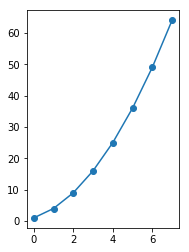

In [46]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

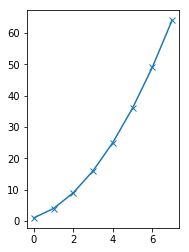

In [47]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

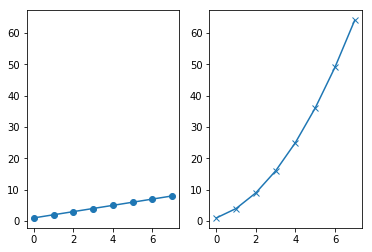

In [44]:
'''如下：使用subplot的目的往往是为了并列显示多个图表'''
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass ‘sharey=ax1’ to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

/Users/xiucat/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


True

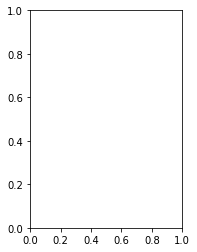

In [38]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

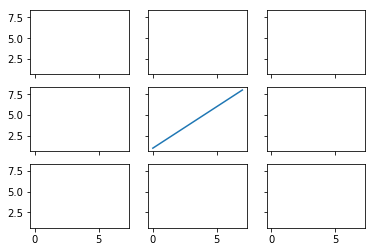

In [50]:
# 【注意】是复数，subplots，一个新的function 
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

In [51]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

<Figure size 432x288 with 0 Axes>

In [52]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

<Figure size 432x288 with 0 Axes>

# Histograms

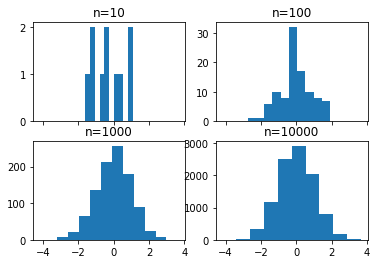

In [53]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)): #跑个循环，令n=axs中的值的数量
    sample_size = 10**(n+1) #然后令sample_size等于10的1次方，2次方，3次方...等等
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

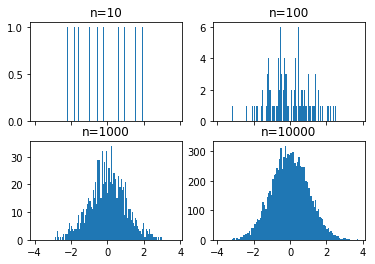

In [54]:
# repeat with number of bins set to 100 【把bar的数量扩大到100，上面是默认的10】
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

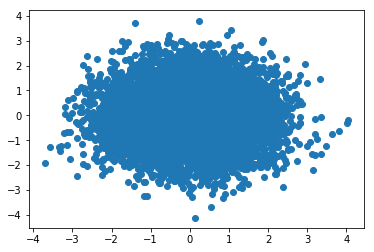

In [56]:
'''把x值定义为不同的分布方式，可以看到不同的图形效果'''
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)#y值定义为正态分布
X = np.random.normal(loc=0.0, scale=1.0, size=10000)#x值定义为正态分布
#X = np.random.random(size=10000)#或者x值定义为随机分布
plt.scatter(X,Y)

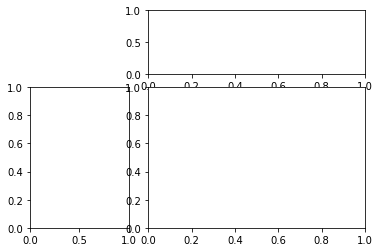

In [8]:


# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec #使用 matplotlib下面的 gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [5]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [10]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()
plt.figure()

/Users/xiucat/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
%%HTML
<img src='http://educationxpress.mit.edu/sites/default/files/journal/WP1-Fig13.jpg' />

# Box and Whisker Plots

In [12]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [13]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.006632,0.499012,2.006245
std,1.002688,0.288691,1.427543
min,-3.818317,0.000028,0.018429
25%,-0.662700,0.245275,0.961656
50%,0.010786,0.495878,1.690056
75%,0.678806,0.750434,2.698152
max,4.295112,0.999968,14.405026


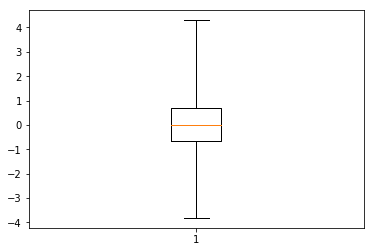

In [14]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')

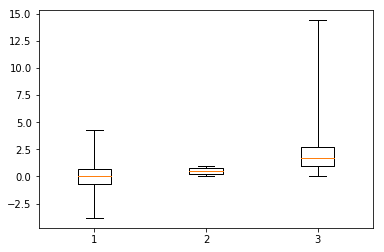

In [15]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

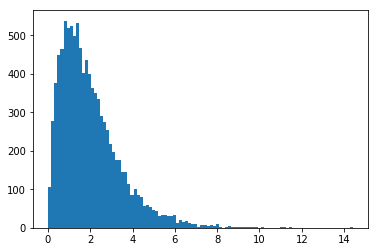

In [19]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

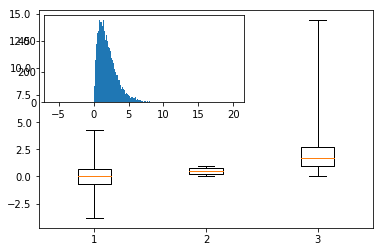

In [22]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [23]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

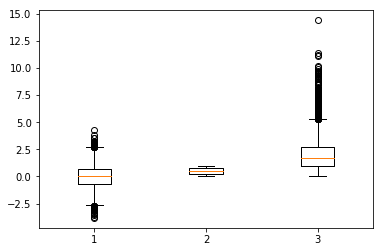

In [24]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

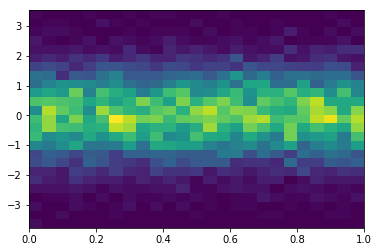

In [27]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
#X = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

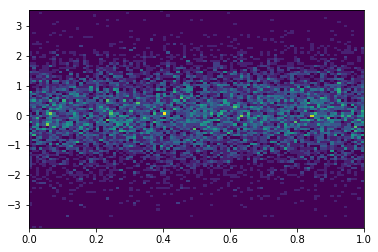

In [28]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

In [39]:
# add a colorbar legend
plt.colorbar()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>

# Animations

In [40]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [41]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

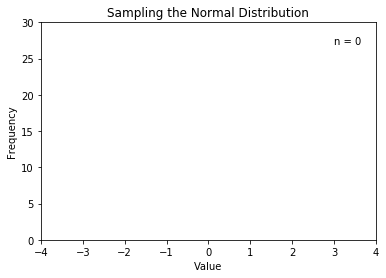

In [42]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=1)

# Interactivity

5

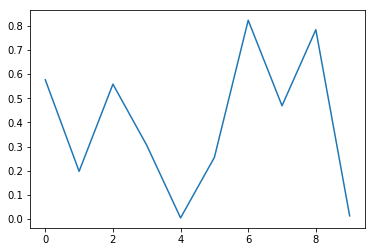

In [62]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [63]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.883774,0.277204,Mexico
1,0.762695,0.695827,India
2,0.249583,0.987766,China
3,0.044110,0.518764,Brazil
4,0.047255,0.263612,Chile
5,0.325055,0.399767,USA
6,0.435533,0.621337,UK
7,0.230448,0.309990,Canada
8,0.729762,0.760538,Iraq
9,0.984443,0.994132,Germany


5

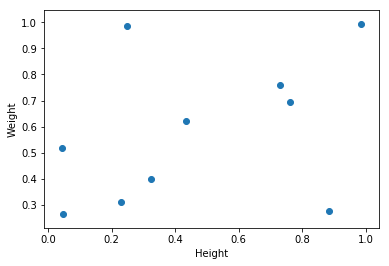

In [64]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')


In [60]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)


5

<Figure size 432x288 with 0 Axes>